In [159]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

import matplotlib.pyplot as plt

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
def cv_evaluator(model, x, y, folds):
    # Returns mean accuracy of n_folds cross validation
    mean_accuracy = cross_val_score(
        model, 
        x_train, 
        y_train, 
        cv=folds,
    ).mean()
    
    return mean_accuracy

In [93]:
cross_val_score(model, x_train, y_train, cv=folds)

array([0.90095485, 0.90077695, 0.89300745, 0.89899644, 0.90255746])

In [94]:
df = pd.read_csv('../data/bank-additional-full.csv', delimiter = ';')
df.drop(columns='duration', inplace=True)

In [95]:
df.columns = [ c.replace('.','_') for c in df.columns]

In [96]:
categorical = ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [97]:
y_vals = df['y'].apply(lambda x: 1 if x=='yes' else 0).values

In [98]:
for cat in categorical:
    df = pd.concat([df, pd.get_dummies(df[cat], prefix=cat, drop_first=True)], axis=1) 

df.drop(columns=categorical, inplace=True)

In [99]:
cols = df.drop(columns=['y']).columns

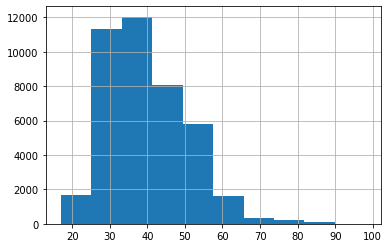

In [165]:
df['age'].hist()

In [166]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns=['y']), 
    y_vals, 
    random_state=20191102
)
folds = KFold(n_splits=5, shuffle=True, random_state=20191102)

In [101]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [102]:
# Export Scaler
joblib.dump(scaler,  '../MLModels/scaler.joblib')

['../MLModels/scaler.joblib']

## Logistic Regression

In [126]:
log_model = LogisticRegression() 
log_model.fit(x_train, y_train)
prediction = log_model.predict(x_test)

In [127]:
joblib.dump(log_model, '../MLModels/logistic_regression.joblib')

['../MLModels/logistic_regression.joblib']

In [128]:
print(cv_evaluator(log_model, x_train, y_train, folds))

0.8979313594207472


In [129]:
print(confusion_matrix(y_test, prediction)/len(prediction)*100)

[[87.89938817  1.31106147]
 [ 8.3131009   2.47644945]]


## Random Forests

In [130]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(x_train, y_train)
prediction = rf_model.predict(x_test)

In [131]:
joblib.dump(rf_model, '../MLModels/random_forests.joblib')

['../MLModels/random_forests.joblib']

In [132]:
print(cv_evaluator(rf_model, x_train, y_train, folds))

0.8904858722442073


In [133]:
print(confusion_matrix(y_test, prediction)/len(prediction)*100)

[[86.4426532   2.76779645]
 [ 7.64300282  3.14654754]]


#### Feature Importance using RF

In [134]:
feature_importance = sorted(
    zip(
        map(lambda x: round(x, 4), 
            rf_model.feature_importances_
           ), cols), 
             reverse=True
)

In [135]:
# Top 10 important features
for f in feature_importance[:10]: print(f)

(0.1737, 'age')
(0.1344, 'euribor3m')
(0.0864, 'campaign')
(0.0471, 'nr_employed')
(0.0395, 'housing_yes')
(0.031, 'pdays')
(0.0277, 'cons_conf_idx')
(0.0244, 'loan_yes')
(0.0236, 'poutcome_success')
(0.0236, 'cons_price_idx')


### XGBoost

In [136]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)
prediction = xgb_model.predict(x_test)

In [105]:
x_train

array([[-0.29088392,  1.96759689,  0.19672691, ...,  2.02465001,
         0.39859259, -0.18628219],
       [-0.19503753, -0.20371013,  0.19672691, ..., -0.49391253,
         0.39859259, -0.18628219],
       [ 1.43435115,  1.60571239,  0.19672691, ..., -0.49391253,
         0.39859259, -0.18628219],
       ...,
       [ 0.95511918,  0.52005888,  0.19672691, ..., -0.49391253,
         0.39859259, -0.18628219],
       [ 0.28419444, -0.56559463,  0.19672691, ...,  2.02465001,
         0.39859259, -0.18628219],
       [-0.96180867, -0.56559463,  0.19672691, ..., -0.49391253,
         0.39859259, -0.18628219]])

In [137]:
joblib.dump(xgb_model, '../MLModels/xgb.joblib')

['../MLModels/xgb.joblib']

In [107]:
print(cv_evaluator(model, x_train, y_train, folds))

0.8992586288492372


In [125]:
print(confusion_matrix(y_test, prediction)/len(prediction)*100)

[[87.89938817  1.31106147]
 [ 8.24511994  2.54443042]]
